In [1]:
import pandas as pd
import numpy as np
import statistics as st

In [3]:
students_scores = pd.read_csv("/content/DS1_C4_S7_Students_Scores_Data_Practice.csv")
students_scores

,Statistics,Python,Tableau
0,61,86,66
1,54,86,72
2,56,80,78
3,54,85,45
4,53,84,68
...,...,...,...
95,60,76,64
96,59,89,70
97,62,80,46
98,58,89,74


In [8]:
#Task1:
Mean =[]
Median =[]
Mode =[]

for col in students_scores:  #iterating over each row from the dataframe
  Mean.append(students_scores.loc[:,col].mean())
  Median.append(students_scores.loc[:,col].median())
  Mode.append(st.mode(students_scores[col]))

print(Mean)
print(Median)
print(Mode)

row_head = ['Mean','Median','Mode']
col_names =['Statistics','Python','Tableau']

d_data = pd.DataFrame([Mean,Median,Mode], columns = col_names)
d_data

d_data.insert(0,"Measurs",row_head,True)
print(d_data)

#Interpretation:in this students_scores_data python students got high score compare with statistics,Tableau students

[60.89, 81.84, 68.02]
[60.0, 82.0, 69.0]
[55, 86, 65]
  Measurs  Statistics  Python  Tableau
0    Mean       60.89   81.84    68.02
1  Median       60.00   82.00    69.00
2    Mode       55.00   86.00    65.00


In [12]:
#task2:
#Calculation for Standard deviation and coefficient of variation
Mean =[]
SD =[]
CV =[]
VAR =[]
for col in students_scores:
  col_mean = students_scores.loc[:,col].mean()
  Mean.append(col_mean)
  col_sd = students_scores.loc[:,col].std()
  SD.append(col_sd)
  col_var=students_scores.loc[:,col].var()
  VAR.append(col_var)
  CV.append(col_sd/col_mean*100)

row_head = ['Variance','Coefficient of Variation']
col_names =['Statistics','Python','Tableau']
d_data = pd.DataFrame([CV,VAR],columns = col_names)

d_data.insert(0,"Measures",row_head,True)
print(d_data)

                   Measures  Statistics     Python    Tableau
0                  Variance   11.883931   5.309731  10.762862
1  Coefficient of Variation   52.361515  18.883232  53.595556


In [18]:
#Task3:
for students in students_scores:
  LO = []#lower outlier list
  UO = []#upper outlier list
  Student_series = pd.Series(students_scores[students])
  print(Student_series)
  Max = max(Student_series)
  Min = min(Student_series)
  Range = Max-Min
  Q1 = Student_series.quantile(0.25)  #Quartile1
  Q3 = Student_series.quantile(0.75)   #Quartile3
  IQR = Q3 -Q1
  LF = Q1-1.5*IQR
  UF = Q3+1.5*IQR
  for i in students_scores[students]:
    if(i < LF):
      LO.append(i)
    if(i > UF):
      UO.append(i)

  if (students == 'Statistics'):
       Statistics = ['Statistics ',Min,Max,Range,Q1,Q3,IQR,LF,UF,[LO,UO]]
  elif(students == 'Python'):
       Python = ['Python',Min,Max,Range,Q1,Q3,IQR,LF,UF,[LO,UO]]
  else:
       Tableau = ['Tableau',Min,Max,Range,Q1,Q3,IQR,LF,UF,[LO,UO]]

col_names = ['student_scores','Min','Max','Range','Q1','Q3','IQR','LF','UF','Outliers']

d_data = pd.DataFrame ([Statistics,Python,Tableau],columns = col_names)
print(d_data)

#Interpretation:
'''Tableau is the most skewed subject because:
It has the highest range (34) among the subjects, indicating a broader spread of scores.
It has several outliers, which often contribute to skewness.
Although its IQR is not the highest, the presence of multiple outliers indicates a significant deviation from the central distribution.'''


0     61
1     54
2     56
3     54
4     53
      ..
95    60
96    59
97    62
98    58
99    67
Name: Statistics, Length: 100, dtype: int64
0     86
1     86
2     80
3     85
4     84
      ..
95    76
96    89
97    80
98    89
99    77
Name: Python, Length: 100, dtype: int64
0     66
1     72
2     78
3     45
4     68
      ..
95    64
96    70
97    46
98    74
99    70
Name: Tableau, Length: 100, dtype: int64
  student_scores  Min  Max  Range    Q1     Q3    IQR      LF      UF  \
0    Statistics    50   74     24  54.0  67.00  13.00  34.500  86.500   
1         Python   75   89     14  78.0  86.00   8.00  66.000  98.000   
2        Tableau   45   79     34  64.0  73.25   9.25  50.125  87.125   

                         Outliers  
0                        [[], []]  
1                        [[], []]  
2  [[45, 50, 50, 50, 46, 46], []]  


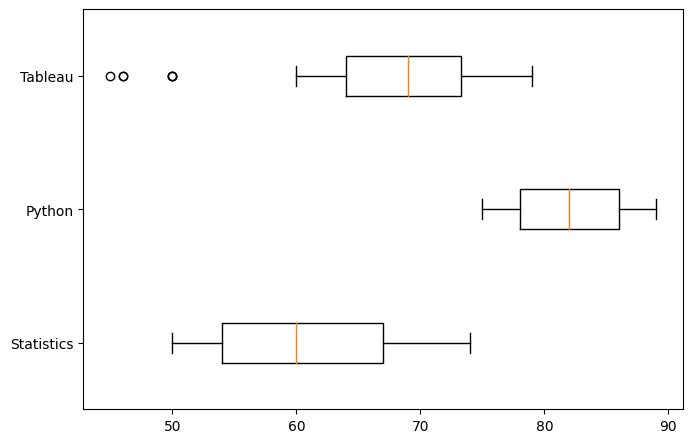

In [19]:
#Task4:
#Visualisating the spread of data
import matplotlib.pyplot as plt

Statistics_scores = students_scores["Statistics"].to_list()
Python_scores = students_scores["Python"].to_list()
Tableau_scores = students_scores["Tableau"].to_list()


#setting the figure size
fig = plt.figure (figsize = (6,4))

#creating the axes
ax = fig.add_axes([0,0,1,1]) #(left,bottam,width,height)

#creating the boxplots for each organization
plt.boxplot([Statistics_scores,Python_scores,Tableau_scores], vert=0)

#set y_axis label
ax.set_yticklabels(["Statistics","Python","Tableau"])

plt.show()

#Interpretation:here this boxplot shows "Tableau is the most skewed subject "

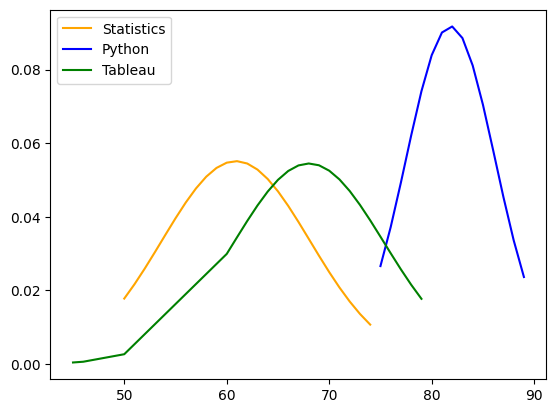

In [20]:
#Task5:
from scipy.stats import norm
#pdf probability distribution function

#sort Data
Statistics_scores = sorted(Statistics_scores)
Python_scores = sorted(Python_scores)
Tableau_scores = sorted(Tableau_scores)

#calculating the Mean and std dev
S_mean = st.mean(Statistics_scores)
S_sd = st.stdev(Statistics_scores)
P_mean = st.mean(Python_scores)
P_sd = st.stdev(Python_scores)
T_mean = st.mean(Tableau_scores)
T_sd = st.stdev(Tableau_scores)

#drawing plots using sorted data  and normalized data
plt.plot(Statistics_scores, norm.pdf(Statistics_scores,S_mean,S_sd),color="orange",label = "Statistics")
plt.plot(Python_scores, norm.pdf(Python_scores,P_mean,P_sd),color="blue",label = "Python")
plt.plot(Tableau_scores, norm.pdf(Tableau_scores,T_mean,T_sd),color="green",label = "Tableau")

#legends
plt.legend()
plt.show()

#Interpretation:
"""Here Tableau have Leptokurtic,here high peak and leptokurtic distributions have many outliers,which strech the horizontal axis and create a narrow curve
 with a lot of data.Statistics and Python subject sudents_scores have mesokurtic..A mesokurtic distribution has a medium tail,so outliers are niether highly frequent,nor highly infrequent"""
